In [1]:
import torch
from torch import nn
import numpy as np
from src.data import math_tags
from src.data import set_seq

In [2]:
sequences = math_tags.get_sequences()

In [5]:
pairs = []
for sequence in sequences:
    for seq_set in sequence:
        for i in range(len(seq_set)):
            for j in range(i+1, len(seq_set)):
                pairs.append((seq_set[i],seq_set[j]))

In [1]:
from src.data import set_seq
W1,W2 = set_seq.generate_embedding(pairs, math_tags.N_ELEMENTS)
W = W1.data+W2.data
W_norm = W.div(torch.norm(W,dim=1).view(-1,1))
torch.save(W_norm, 'data/processed/math_tags_embedding.pt')

NameError: name 'pairs' is not defined

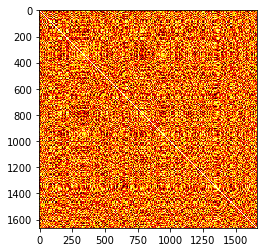

In [8]:
# printing a heat map
import matplotlib.pyplot as plt
heatmap = W_norm.matmul(W_norm.t())
plt.imshow(heatmap.numpy(), cmap='hot')
plt.show()

In [33]:
heatmap = abs(heatmap)

In [41]:
labels = math_tags.get_labels()

kth_relevent = -10
for i in range(1664):
    idx = np.argsort(heatmap[i])
    print("{} {} {}".format(labels[i],labels[idx[kth_relevent]], heatmap[i,idx[kth_relevent]]))

elementary-set-theory monoid 0.9369147419929504
intuition sheaf-cohomology 0.9448180794715881
infinity graded-modules 0.9317139983177185
faq irrational-numbers 0.9415578842163086
calculus magma-cas 0.9469658136367798
limits mobius-band 0.9390059113502502
definition surgery-theory 0.9337458610534668
soft-question cayley-table 0.936543881893158
big-list digamma-function 0.9498895406723022
online-resources conformal-geometry 0.9357921481132507
elementary-number-theory local-field 0.9366823434829712
proof-writing brownian-motion 0.9240267276763916
radicals soddy-circles 0.940811276435852
rationality-testing fourier-motzkin 0.9284855127334595
math-software change-of-basis 0.9525675177574158
linear-algebra ordered-fields 0.933623731136322
combinatorics determinant 0.9540407061576843
generating-functions affine-varieties 0.9545878767967224
fibonacci-numbers continued-fractions 0.9390348196029663
algebra-precalculus initial-value-problems 0.9512320756912231
decimal-expansion interactive-proofs

moduli-space nonlinear-analysis 0.9488568305969238
levy-processes eigenvalues-eigenvectors 0.9430100917816162
divisor-sum divergence 0.9300361275672913
stiefel-manifolds primorial 0.9403705596923828
voting-theory polya-urn-model 0.9325248003005981
group-extensions geodesy 0.9393597841262817
quantum-mechanics stochastic-calculus 0.9227914214134216
normal-families groebner-generators 0.9576852321624756
reverse-math profinite-groups 0.943666398525238
sumset geometric-interpretation 0.9222192168235779
inverse-function algebraic-numbers 0.9341889023780823
etale-cohomology trigonometric-equations 0.9364203810691833
open-map morse-theory 0.9371458292007446
harmonic-functions cartan-geometry 0.9415304660797119
epsilon-delta fourier-analysis 0.9258697628974915
runge-kutta-methods nonclassical-logic 0.9496845006942749
delay-differential-equations poisson-geometry 0.9496101140975952
rational-numbers symmetry 0.9316228628158569
chain-rule convergence-acceleration 0.9325402975082397
groups-enumerat

rounding-unit cyclotomic-polynomials 0.9277990460395813
hilbert-matrices binomial-theorem 0.9203954935073853
divergence divisor-sum 0.9300361275672913
secant almost-complex 0.9269846081733704
lambda-rings measurable-functions 0.9406833648681641
holomorphic-functions sierpinski-numbers 0.9174497723579407
st-connectivity surreal-numbers 0.9538347125053406
cut-space continuum-theory 0.9340878129005432
lu-decomposition mellin-transform 0.932932436466217
sampling-theory fusion-categories 0.9502013921737671
dglas geodesy 0.9397414922714233
rational-homotopy-theory matching-theory 0.9364429116249084
cumulants clifford-algebras 0.9275248646736145
soliton-theory riemann-zeta 0.938075840473175
ring-homomorphism additive-categories 0.9606748819351196
resultant yoneda-lemma 0.9546101093292236
interval-arithmetic non-linear-dynamics 0.9397611021995544
semialgebraic-geometry birational-geometry 0.9381809830665588
euler-method iterated-integrals 0.9518539905548096
fixed-point-arithmetics haar-measure

In [42]:
heatmap

tensor([[1.0000, 0.0494, 0.0188,  ..., 0.2037, 0.1763, 0.0161],
        [0.0494, 1.0000, 0.3079,  ..., 0.0167, 0.8330, 0.1781],
        [0.0188, 0.3079, 1.0000,  ..., 0.0450, 0.1385, 0.5711],
        ...,
        [0.2037, 0.0167, 0.0450,  ..., 1.0000, 0.1543, 0.3871],
        [0.1763, 0.8330, 0.1385,  ..., 0.1543, 1.0000, 0.6007],
        [0.0161, 0.1781, 0.5711,  ..., 0.3871, 0.6007, 1.0000]])

In [44]:
heatmap[[1,3,4]].size()

torch.Size([3, 1664])

In [3]:
W_norm = torch.load('data/processed/math_tags_embedding.pt')

In [10]:
from src.model.set_sequence import SetSequenceModel
model = SetSequenceModel(100, math_tags.N_ELEMENTS, W_norm)
outputs = model(sequences[0])

In [18]:
sigmoid = nn.Sigmoid()
sigmoid(outputs).size()

torch.Size([28, 1664])

In [ ]:
2